# Fast text

In [1]:
import gzip

In [2]:
from gensim import models
ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin.gz')


In [3]:
for w, sim in ko_model.wv.similar_by_word('파이썬', 10):
    print(f'{w}: {sim}')

Python: 0.565061628818512
자이썬: 0.5624368786811829
레일스: 0.5598082542419434
파이썬을: 0.5595802068710327
언어용: 0.528820276260376
파이썬의: 0.5250024795532227
프로그래밍: 0.5225088000297546
wxPython: 0.5222088694572449
파이썬이나: 0.5201171636581421
함수형: 0.51873779296875


## 두 단어 유사도

In [4]:
print(f"'코알라'과 '쿠키'의 유사도: {ko_model.wv.similarity('코알라', '쿠키')}")

'코알라'과 '쿠키'의 유사도: 0.21819423139095306


## 한글폰트

In [5]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumMyeongjo', 'C:\\WINDOWS\\Fonts\\NanumMyeongjoExtraBold.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjo.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothicBold.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothic.ttf'),
 ('NanumMyeongjo', 'C:\\WINDOWS\\Fonts\\NanumMyeongjo.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicExtraBold.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7f.TTF'),
 ('NanumMyeongjo', 'C:\\WINDOWS\\Fonts\\NanumMyeongjoBold.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7fEXTRABOLD.TTF'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicLight.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothicLight.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothic.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjoExtraBold.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjoBold.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumG

## 필요한 모듈 import

In [6]:
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Okt
import nltk

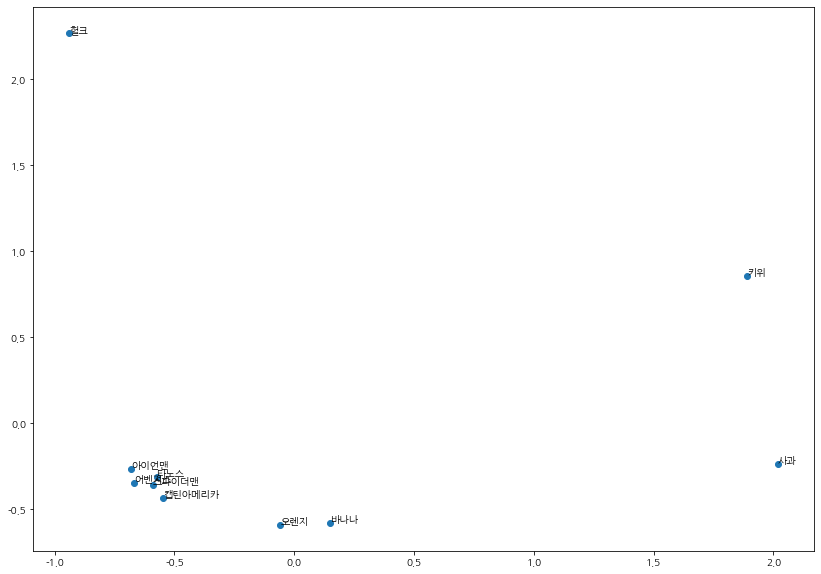

In [7]:
# 그래프
words = ['사과', '바나나', '오렌지', '키위', '스파이더맨', '아이언맨', '헐크', '타노스', '캡틴아메리카', '어벤져스']

pca = PCA(n_components=2)
xys = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])
xs = xys[:,0]
ys = xys[:,1]

mpl.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지
plt.rc('font', family = 'NanumGothic')   #나눔고딕을 기본 글꼴로 설정
plt.figure(figsize=(14, 10), )
plt.scatter(xs, ys, marker='o')
for i, v in enumerate(words):
    plt.annotate(v, xy=(xs[i], ys[i]))

## 새로운 글 & 기존 글(상위 5개) 토큰 사이 유사도 검사 
### 1. 데이터 불러오기

In [8]:
data = pd.read_excel('train_data.xlsx')[['제목', '청원수', '본문']]
okt = Okt()

delete_word = ['이', '그', '그녀', '저', '것', '들', '제', '저희', '너', '되', '수', '않', '없', '아니',
               '때문', '곳', '등', '들', '중', '좀', '잘', '더', '더욱', '경우', '후', '때', '있', '하', ]

final_token = []
new_final_token = []
df = pd.DataFrame(columns=['청원글', '청원수', '상위토큰', '유사도'])

### 2. 인풋 받기

In [18]:
# 인풋
new_petition = okt.nouns(input("새로 청원할 글을 입력하세요: "))

새로 청원할 글을 입력하세요: 새로 청원할 글을 입력하세요: 코로나19 사태에 따라 캠퍼스 안전문제, 학습권 손실, 경제적 피해에 이르는 문제들에 우리 목소리를 전달하기 위해서입니다.약 100개 대학의 학생 대표자들이 어떤 편향적 정치색을 배제한 채로 모였고, 이제는 우리 이야기를 교육부가 들어주겠지.’라는 마음으로 학생들의 목소리를 정리하여 교육부에 만남을 요청하는 공문을 보냈습니다.우리가 요청하고자 한 목소리는 다음과 같습니다.-------------------------------------------------------------------------------------------------------------------------------1. 누군가의 언니, 형, 누나, 오빠인 우리 대학생들 그리고 코로나19로 인한 안전문제.우리 청년세대를 포함해서 미래 시대를 이끌 초중고교생들의 안전은 인류의 미래입니다. 강제등교로 인해 우리 동생들이 코로나19에 집단 감염되었습니다. 거대담론을 떠나서 언니, 형, 누나, 오빠로서 내 동생이 코로나19에 확진되었고 고통을 받았습니다. 정부의 지침으로 학생들의 생명이 위협되는 일은 발생하지 말아야 합니다.대학가의 지침 역시도 마땅히 안전이 우선되어야 합니다. 일부 대면강의 및 시험으로 대학가에도 코로나19 방역에 적신호가 켜졌습니다. 특히, 대면시험의 경우는 전국적인 이동이 발생함으로 소규모 지역감염을 넘어서 코로나19가 확산되는 경로가 될 수 있습니다. 교육부와 대학은 이러한 사안들을 당사자인 우리 학생들의 입장에서 고려할 필요가 있고 우리는 현 상황을 생생하게 전달할 필요가 있습니다.2. 경제적 침체와 등록금 문제로 인해 고통받는 우리 청년들 그리고 ’나‘ 때문에 남몰래 눈물 훔치는 부모님.경제활동에 가장 취약한 세대인 우리 청년들은 등록금을 마련하기 위해 아르바이트를 하거나 부모님께 손을 벌리곤 했습니다. 코로나19 사태가 발발함에 따라 아르바이트를 구하는 것조차 어려워졌습니다. 나아가 가정을 책임져야 하

### 3. 기존 청원글 토큰화


In [22]:
# 3. 기존 청원글 토큰화

# for i in range(10):
for i in range(data['제목'].count()):
    # 제목 토큰
    title_token = okt.nouns(data['제목'][i])
    # 콘텐트 토큰
    content_token = okt.nouns(data['본문'][i])
    text = nltk.Text(content_token)
    # 출현 빈도가 높은 본문 상위 토큰 15개
    selected_words = [f[0] for f in text.vocab().most_common(15)]
    
# 4. 제목이랑 본문상위토큰 15개 합치기
    hap_token = title_token + selected_words
    print("제목 토큰 & 본문에서 가장 많이 나온 명사 15개: \n", hap_token)
    
# 5. 불용어 제거하기
    for word in hap_token:
        if word not in delete_word:
            final_token.append(word)
            
# 5-2. 불용어 제거한 후, 5개 토큰만 추출
    final_token = final_token[:5]
    print("불용어 제거한 최종 토큰: \n", final_token)
    

#     print("-" * 50)
    
# 6. 새로운 글 & 기존의 청원글과 자카드 유사도 검사
    def Jaccard_similarity(existing, new):
        # 중복되는 단어 제거
        existing = set(existing)
        new = set(new)
        return len(existing & new) / len(existing | new)

    # 새로운 청원글 토큰화
    new_text = nltk.Text(new_petition)
    new_selected_words = [f[0] for f in new_text.vocab().most_common(15)]
    # 새로운 청원글 불용어 제거
    for word in new_selected_words:
        if word not in delete_word:
            new_final_token.append(word)

    # 기존의 모든 청원글과 새로운 청원글의 자카드 유사도 출력
    print('"' + data['제목'][i] + '"' + " 청원글과의 유사도: ", Jaccard_similarity(final_token, new_final_token))
    print("-" * 50)

    df = df.append({'청원글':data['제목'][i], '청원수': data['청원수'][i], '상위토큰': final_token, '유사도':Jaccard_similarity(final_token, new_final_token)}, ignore_index=True)
    final_token = []

제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['부정', '채용', '처벌', '채용', '부정', '것', '사건', '합격', '수', '위', '행위', '처벌', '사실', '직접', '모든', '금융감독원', '사회', '면직']
불용어 제거한 최종 토큰: 
 ['부정', '채용', '처벌', '채용', '부정']
"부정채용, 확실히 밝히고 공정하게 처벌해주세요." 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['대구광역시', '인사', '혁신', '처', '운전', '직렬', '문제', '출제', '위원', '고발', '문제', '시험', '것', '보기', '직렬', '해당', '번', '범위', '정답', '수험', '수', '과정', '출제', '더', '과목']
불용어 제거한 최종 토큰: 
 ['대구광역시', '인사', '혁신', '처', '운전']
"대구광역시 인사혁신처 운전직렬 문제 출제 위원을 고발합니다." 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['시', '부당이득', '행위', '부실', '행정', '고발', '그', '저', '일당', '시', '제', '국민', '이', '산업', '단지', '당시', '공무원', '대구', '노인', '장애인', '사기']
불용어 제거한 최종 토큰: 
 ['시', '부당이득', '행위', '부실', '행정']
"**시의 부당이득행위와 부실행정을 고발합니다" 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['회사', '경리', '공금', '횡령', '경찰', '검찰', '사시', '범죄', 

제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['고래잡이', '사범', '전원', '구속', '고래고기', '유통', '금지', '고래', '불법', '작살', '포경', '보호', '선박', '해경', '바다', '포획', '벌금', '수', '고래잡이', '모습', '적발', '조사']
불용어 제거한 최종 토큰: 
 ['고래잡이', '사범', '전원', '구속', '고래고기']
"고래잡이 사범들을 전원 구속하고, 고래고기 유통 금지하라" 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['보청기', '보조금', '신청', '절차', '안내', '개정안', '당사자', '목소리', '좀', '보청기', '사용', '것', '농인', '청각장애', '지원', '구입', '비', '보조금', '배터리', '수', '관리', '때', '부담', '위해']
불용어 제거한 최종 토큰: 
 ['보청기', '보조금', '신청', '절차', '안내']
""보청기 보조금 신청 절차 안내 2020년 7월 개정안" 당사자의 목소리 좀 들어주세요" 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['아동복지법', '아동학대', '범죄', '처벌', '등', '관', '특례법', '아동학대', '처벌', '법', '개정', '촉구', '창녕', '아동학대', '사건', '수', '아동', '피해', '보호', '가정', '아동학대', '기간', '사건', '제', '경우', '이', '다시', '소식', '부모', '시설']
불용어 제거한 최종 토큰: 
 ['아동복지법', '아동학대', '범죄', '처벌', '관']
"아동복지법, 아동학대범죄의 처벌 등에 관한 특례법(아동학대처벌법) 개정을 촉구합니다. (창녕 아동학

제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['경찰', '공무원', '윤리', '강경', '위반', '청렴', '결여', '및', '협박', '근절', '경찰', '신분', '공무원', '소란', '실추', '민간인', '협박', '내용', '증거', '자료', '청원', '이', '다단계', '뉴', '스킨']
불용어 제거한 최종 토큰: 
 ['경찰', '공무원', '윤리', '강경', '위반']
"경찰 공무원 윤리강경 위반과 청렴성 결여 및 협박을 근절해 주세요" 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['국제', '커플', '정말', '태국', '영사관', '무자', '부디', '생이별', '서류', '방문', '신청', '제출', '비자', '안내', '한국', '영사관', '업무', '지금', '이유', '태국', '준비', '등', '다시']
불용어 제거한 최종 토큰: 
 ['국제', '커플', '정말', '태국', '영사관']
"국제커플 정말 힘듭니다. 주태국영사관 근무자들 너무 합니다 부디 생이별 하지않게 도와주세요...." 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['금천구', '공군', '부대', '비위', '행위', '폭로', '병사', '부대', '해당', '우리', '것', '부사관', '때문', '이', '때', '부모', '생활관', '제', '감찰', '생각', '의혹']
불용어 제거한 최종 토큰: 
 ['금천구', '공군', '부대', '비위', '행위']
"[금천구 공군 부대의 비위 행위를 폭로합니다.]" 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서

제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['위치', '추적', '맞춤', '광장', '앱', '중지', '시간', '앱', '현장', '도입', '맞춤', '또', '광장', '데이터', '노인', '방문', '시간표', '무료', '위치', '추적', '그']
불용어 제거한 최종 토큰: 
 ['위치', '추적', '맞춤', '광장', '앱']
"위치추적하는 맞춤광장앱을 중지해주십시오." 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['중증', '아토피', '치료', '제', '듀피젠트', '급여', '기준', '완화', '치료', '아토피', '투여', '환자', '듀피젠트', '기준', '이상', '수', '급여', '스테로이드', '중증', '면역', '억제제', '경우', '검사']
불용어 제거한 최종 토큰: 
 ['중증', '아토피', '치료', '듀피젠트', '급여']
"중증아토피치료제 듀피젠트 급여 기준 완화" 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['공도', '국가', '균형발전', '위', '전철', '꼭', '안성', '철도', '제', '공도', '교통', '지역', '동탄', '걸', '압니', '고향', '수도', '권내', '가장', '환경', '격']
불용어 제거한 최종 토큰: 
 ['공도', '국가', '균형발전', '위', '전철']
"공도에 국가균형발전을 위한 전철 꼭 필요합니다!" 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['국내', '생명', '보험사', '위', '생명', '환자', '대상', '보험', 

제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['저희', '아이', '학교폭력', '피해자', '학교', '교육청', '대처', '신고', '피해자', '선생님', '아이', '가해자', '반', '학교', '수', '중', '치료', '이', '그', '부장', '말', '학생', '보호']
불용어 제거한 최종 토큰: 
 ['아이', '학교폭력', '피해자', '학교', '교육청']
"저희 아이는 학교폭력 피해자입니다. 학교와 교육청의 미진한 대처를 신고합니다." 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['가덕도', '공항', '조속', '건설', '청원', '공항', '김해', '부산', '수', '가덕도', '확장', '지역', '등', '것', '활주로', '세계', '항', '운영', '사고', '더']
불용어 제거한 최종 토큰: 
 ['가덕도', '공항', '조속', '건설', '청원']
"가덕도 신공항의 조속한 건설을 청원합니다." 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['신혼여행', '모리셔스', '입국', '금지', '관', '환불', '진짜', '수', '모리셔스', '여행사', '바', '처', '사용', '저', '이', '항공', '에어모리셔스', '환불', '지금', '경우', '신청', '거']
불용어 제거한 최종 토큰: 
 ['신혼여행', '모리셔스', '입국', '금지', '관']
"신혼여행지 모리셔스 입국금지에 관한 환불이 이뤄지지 않고있습니다. 1년이상 걸린다는데 진짜 미치겠네요.." 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 

"쿠팡의 코로나 확진자은폐로 남편이 사경을 헤매고 있습니다." 청원글과의 유사도:  0.058823529411764705
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['못', '뉴스', '정보', '제공', '김어준', '뉴스', '공', '것', '대해', '또한', '뉴스', '김어준', '방송', '어르신', '왜곡', '정의', '연', '폭로', '이용수', '할머니', '비난', '배후']
불용어 제거한 최종 토큰: 
 ['못', '뉴스', '정보', '제공', '김어준']
"잘 못 된 뉴스정보를 제공하는 김어준의 뉴스공장는 없어져야 합니다." 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['대학교', '대면', '기말고사', '시행', '학생', '학교', '생각', '저희', '기말고사', '의견', '수렴', '수업', '대면', '시험', '및', '때문', '기숙사', '것', '이']
불용어 제거한 최종 토큰: 
 ['대학교', '대면', '기말고사', '시행', '학생']
"대학교의 무리한 대면기말고사 시행을 멈춰주세요" 청원글과의 유사도:  0.058823529411764705
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['북극곰', '북극곰', '요즘', '지구', '온난화', '북극', '빙하', '살기', '위해', '아래', '제', '부탁', '것', '쓰레기', '바닥', '사람']
불용어 제거한 최종 토큰: 
 ['북극곰', '북극곰', '요즘', '지구', '온난화']
"북극곰을 지켜주세요." 청원글과의 유사도:  0.0
-----------------------------------

 ['지금', '교육부', '학생', '만날', '수', '우리', '등록금', '반환', '정말', '요', '음성', '파일', '우리', '교육부', '학생', '대학', '것', '코로나', '수', '대학생', '교육', '청년', '목소리', '시대', '등록금', '간담', '대화']
불용어 제거한 최종 토큰: 
 ['지금', '교육부', '학생', '만날', '우리']
"지금 교육부는 바빠서 학생들을 만날 수 없다고 합니다. 우리 등록금 반환 정말 어려운걸까요?(음성파일有)" 청원글과의 유사도:  0.2
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['윤미향', '의원', '의원직', '사퇴', '요구', '윤미향', '정의', '연', '할머니', '위안부', '기부', '검찰', '의혹', '국민', '모금', '후원', '후원자', '집', '의원', '부금']
불용어 제거한 최종 토큰: 
 ['윤미향', '의원', '의원직', '사퇴', '요구']
"윤미향의원의 의원직사퇴를 강력히 요구합니다" 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['정의', '연', '진실', '위안부', '할머니', '명예', '회복', '할머니', '위안부', '이용수', '치매', '취급', '국가', '생각', '위해', '윤미향', '진실', '것', '극우', '단체', '여성', '그']
불용어 제거한 최종 토큰: 
 ['정의', '연', '진실', '위안부', '할머니']
"정의연의 진실을 밝히고, 위안부 할머니들의 명예를 회복시켜주세요." 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 [

제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['명동', '국가', '재난', '사태', '고하', '글', '명동', '상황', '동대문', '외국인', '국가', '관광', '특', '수', '휴업', '등', '저희', '폐업', '피해', '저', '상대로']
불용어 제거한 최종 토큰: 
 ['명동', '국가', '재난', '사태', '고하']
"명동의 국가재난 사태를 고하는 글" 청원글과의 유사도:  0.058823529411764705
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['마을', '가운데', '문중', '묘지', '허가', '준', '경기', '광주시', '행정', '취소', '마을', '문중', '묘지', '행정', '수', '위', '경기', '광주시', '광주', '중', '위치', '지붕', '고발', '시청', '곳']
불용어 제거한 최종 토큰: 
 ['마을', '가운데', '문중', '묘지', '허가']
"마을 한 가운데 문중묘지를 허가해 준 경기 광주시의 행정을 취소해 주세요!~" 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가장 많이 나온 명사 15개: 
 ['올해', '정책', '가입', '실비', '보험사', '통원', '의료', '비', '지급', '거절', '국민', '치료', '보험사', '실비', '현재', '보험', '공단', '가입', '의료', '이', '본인', '내년', '환급', '저', '건강']
불용어 제거한 최종 토큰: 
 ['올해', '정책', '가입', '실비', '보험사']
"올해 바뀐 정책으로 가입한 실비보험사에서 통원의료비 지급거절" 청원글과의 유사도:  0.0
--------------------------------------------------
제목 토큰 & 본문에서 가

### 4. 제목이랑 본문상위토큰 합치기

### 5. 불용어 제거하기 -> 5개 최종 토큰만 추출하여 final_token에 저장

### 6. 새로운 글 & 기존의 청원글과 자카드 유사도 검사

### 7. sorting된 순서로 자카드 유사도 가장 높은 상위 5개 글 제시 

In [23]:
sorted_df = df.sort_values(by = ['유사도'], axis = 0, ascending=False, inplace=False)  # 유사도 기준 내림차순으로 정렬
sorted_petition = sorted_df.iloc[:5]  # 상위 5개 글 추출 

# 자카드 유사도가 가장 높은 상위 5개 청원글 출력
print("자카드 유사도가 가장 높은 상위 5개 청원글: \n", sorted_petition)  # 제목과 상위토큰, 유사도 나옴.

자카드 유사도가 가장 높은 상위 5개 청원글: 
                                                     청원글     청원수  \
1552  지금 교육부는 바빠서 학생들을 만날 수 없다고 합니다. 우리 등록금 반환 정말 어려...  86,859   
1549  코로나19사태인 지금 강행으로 진행되고있는 대면시험으로부터 우리 학생들의 건강과 안...     278   
1514                                 대학교는 등록금을 돌려주어야 한다   1,089   
1523           우리 노동자들과 우리 사회 전체를 위험에 빠뜨린 쿠팡을 처벌해 주십시오.   3,132   
1425      최근 ‘황제병사’로 문제되고 있는 부대의 직속 부대 비위를 추가적으로 폭로합니다.   3,522   

                          상위토큰       유사도  
1552     [지금, 교육부, 학생, 만날, 우리]  0.200000  
1549     [코로나, 사태, 지금, 강행, 진행]  0.125000  
1514  [대학교, 등록금, 등록금, 대학교, 생각]  0.066667  
1523     [우리, 노동자, 우리, 사회, 전체]  0.062500  
1425       [최근, 황제, 병사, 로, 문제]  0.058824  


### 8. 새로운 청원글 & 기존 청원글 상위토큰 1:1 유사도 검사

In [88]:
# 새로운 청원글의 상위토큰: new_final_token
# 기존 청원글 5개의 상위 토큰: sorted_petition['상위토큰']
prediction = 0
similarity_rate = 0
similarity_rate_hap = 0

for i, row in sorted_petition.iterrows():
    for k in range(5): # 5개의 상위토큰           
        print(k)
#     print(row)
#     print(i)
#     print(sorted_petition['상위토큰'][0])
#         similarity_rate = ko_model.wv.similarity(new_final_token[k], sorted_petition['상위토큰'][k]) # 1:1 유사도
#         similarity_rate_hap += similarity_rate

0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


In [86]:
for i, row in df.iterrows():   # 5개의 기존 청원글
    for k in range(5): # 5개의 상위토큰           
        similarity_rate = ko_model.wv.similarity(new_final_token[k], sorted_petition['상위토큰'][k]) # 1:1 유사도
        similarity_rate_hap += similarity_rate
    similarity_rate_mean = similarity_rate_hap/5   # 상위토큰 5개의 유사도 평균
    
    weighted_petition_number = similarity_rate_mean * sorted_petition['청원수']   # 유사도*청원수
    numerator += weighted_petition_number  # 분자(유사도*청원수 총합)
    denominator += similarity_rate  # 분모(유사도 총합) 
    
final_prediction = prediction/denominator

0


KeyError: 0